In [0]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [72]:
from google.colab import files
uploaded = files.upload()

import io
my_data = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

Saving creditcard.csv to creditcard (1).csv


In [0]:
df=pd.read_csv('creditcard.csv')

In [74]:
#dataset shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [75]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [76]:
#take a look at data
#sample presented better view than head method
df.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
115712,73983.0,1.194,0.448,0.572,2.249,0.195,0.526,-0.182,0.164,-0.482,0.633,-1.120,-0.436,-0.108,0.211,1.003,0.833,-0.711,-0.362,-1.088,-0.177,-0.129,-0.391,0.005,-0.813,0.328,-0.046,0.018,0.017,0.76,0
12247,21398.0,-0.713,0.322,2.775,-1.761,-0.555,-0.479,0.250,-0.042,2.473,-1.838,2.058,-2.068,0.125,1.373,-0.615,-0.203,0.151,1.102,0.061,-0.140,-0.107,0.145,-0.343,0.455,0.366,-0.868,-0.095,-0.163,11.85,0
73319,55083.0,-0.711,1.216,2.064,1.383,0.539,0.147,0.917,0.052,-0.986,-0.280,-1.429,0.195,0.758,-0.469,-1.405,0.581,-0.761,-0.544,-1.057,-0.093,-0.227,-0.615,-0.193,-0.136,0.203,-0.311,0.062,0.099,18.96,0


In [77]:
#summary for non-anonymized cols
pd.set_option('precision',3)
df.loc[:,['Time','Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


The mean of all transactions is about 88 USD and the largest amount is around 25,691 dollars.

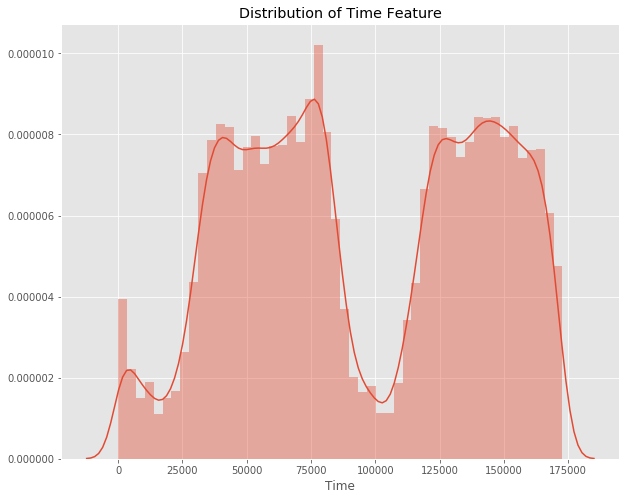

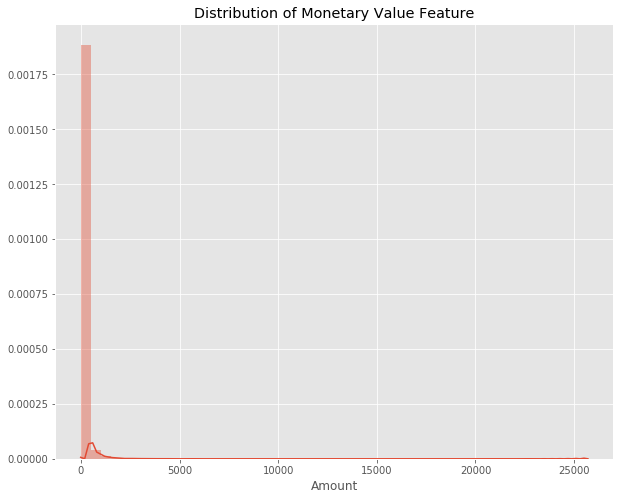

In [78]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [79]:
#fraud vs.non-fraud transactions
counts = df.Class.value_counts()
normal = counts[0]
fraud = counts[1]
perc_normal = (normal/(normal+fraud))*100
perc_fraud = (fraud/(normal+fraud))*100
print('There were {} non-fraud transactions ({:.3f}%) and {} fraud transactions ({:.3f}%).'.format(normal, perc_normal, fraud, perc_fraud))

There were 284315 non-fraud transactions (99.827%) and 492 fraud transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraud, 1:Fraud)')

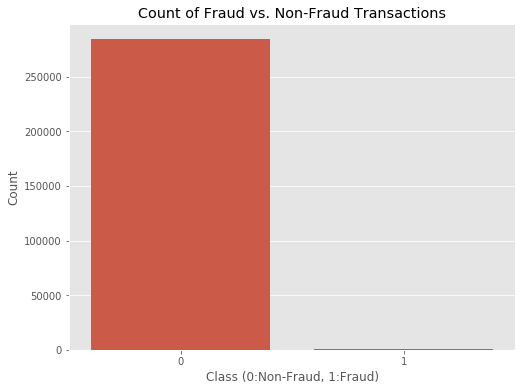

In [80]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraud vs. Non-Fraud Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraud, 1:Fraud)')

In [81]:
#pairwise correlation of columns in matrix
corr=df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,3.062e-02,-2.477e-01,1.243e-01,-6.590e-02,-9.876e-02,-1.835e-01,1.190e-02,-7.330e-02,9.044e-02,2.898e-02,-5.087e-02,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,7.434e-17,2.439e-16,2.422e-16,-2.115e-16,9.353e-16,-3.252e-16,6.309e-16,-5.012e-16,2.870e-16,1.818e-16,1.037e-16,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,-4.782e-16,9.469e-16,-6.588e-16,3.855e-16,-2.541e-16,2.831e-16,4.934e-17,-9.883e-16,2.637e-16,9.528e-17,-9.310e-16,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,6.289e-16,-5.502e-17,2.207e-16,-6.883e-16,4.271e-16,1.123e-16,1.183e-15,4.577e-17,5.428e-16,2.577e-16,-9.429e-16,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,6.055e-16,-2.084e-16,-5.658e-16,-1.506e-16,-8.522e-17,-1.508e-16,-6.939e-16,-4.398e-16,1.494e-16,-2.657e-16,-3.223e-16,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,-6.602e-16,7.343e-16,3.761e-16,-9.579e-16,-3.635e-16,-5.133e-16,-3.517e-16,1.426e-16,1.110e-15,-3.138e-16,2.076e-16,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,2.851e-16,4.866e-16,2.141e-16,-2.268e-16,3.453e-16,-6.368e-18,-2.478e-16,3.568e-16,2.811e-16,2.717e-16,1.899e-16,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,3.043e-17,-1.084e-15,1.510e-15,-9.892e-17,-1.729e-16,1.937e-17,2.894e-16,1.150e-15,-1.117e-16,-2.874e-16,1.744e-16,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,9.052e-17,1.955e-16,-6.266e-17,-2.383e-16,-1.131e-16,2.021e-16,5.027e-16,-3.509e-16,-4.094e-16,-5.340e-16,-1.096e-16,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,-2.772e-16,4.682e-16,-2.445e-15,-2.650e-16,2.343e-16,-1.588e-15,-3.252e-16,6.536e-16,1.204e-16,1.121e-16,-4.341e-16,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Correlation')

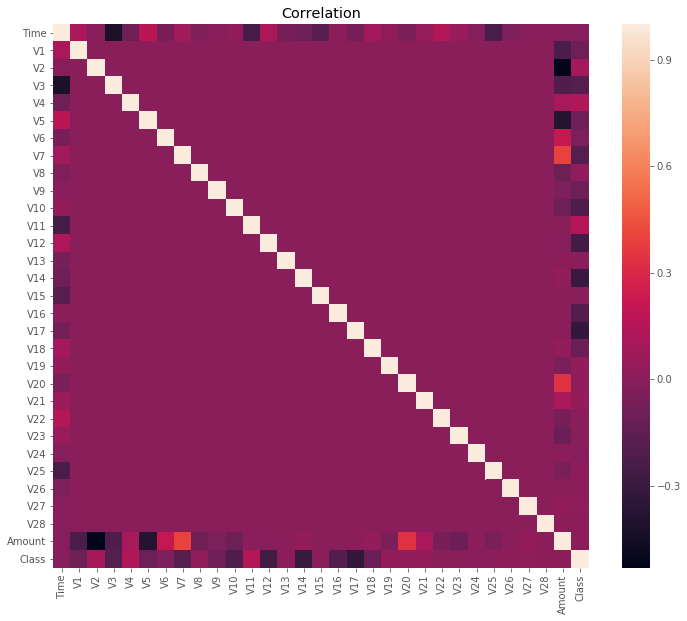

In [82]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Correlation')

In [83]:
#checking skewness
df.skew()

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

No significant correlation found might due to the class imbalance.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [0]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [86]:
#concatenating newly scalled cols
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
223199,143284.0,1.447,-1.188,-2.656,0.112,1.170,1.280,0.452,0.171,0.488,-0.098,0.158,0.449,-0.788,0.923,0.265,-1.025,0.029,-0.650,-0.428,0.217,0.496,1.098,-0.461,-2.332,0.354,0.186,-0.048,-0.058,289.33,0,0.804,1.021
178823,123797.0,0.208,0.863,-0.010,-0.333,0.561,-1.675,1.226,-0.479,0.220,-0.943,-0.304,-1.006,-1.641,-0.849,0.619,0.119,0.492,0.692,-0.790,-0.193,0.227,0.858,-0.261,0.343,-0.132,-0.228,-0.100,-0.155,6.17,0,-0.329,0.610
45133,42217.0,1.299,0.266,-0.204,0.090,-0.089,-1.378,0.539,-0.473,-0.343,-0.125,-0.024,0.842,1.307,0.225,0.620,-0.150,-0.234,-0.845,0.108,0.032,-0.026,-0.016,-0.112,0.511,0.590,1.065,-0.108,-0.004,19.95,0,-0.273,-1.108
144236,85960.0,-1.360,0.546,1.692,-0.889,1.128,-0.382,0.925,-0.111,-0.210,-0.404,0.173,-0.380,-1.369,0.229,-0.583,1.104,-1.670,0.682,-1.238,-0.261,-0.051,-0.283,-0.396,-0.573,0.706,-0.695,-0.483,-0.062,6.95,0,-0.325,-0.186
81028,58762.0,1.053,-0.298,-0.139,0.212,-0.521,-1.260,0.411,-0.342,0.037,-0.154,-0.321,-0.039,-0.352,0.490,0.909,0.078,-0.181,-0.555,0.053,0.168,-0.007,-0.318,-0.144,0.447,0.367,0.997,-0.129,0.018,138.72,0,0.201,-0.759


In [0]:

#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

**Splitting Data into Test and Train** 

In [88]:
#test-train split using numpy's random.rand method]
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256096, 31)
Test Shape: (28711, 31)


In [0]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Create a sub-sample dataset to deal with imbalanced distribution**

In [90]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraud transactions in the train data.'.format(no_of_frauds))

There are 436 fraud transactions in the train data.


In [0]:
#select 442 random non-fraud transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [92]:

selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
17984,1.313,0.216,0.099,0.074,-0.345,-1.329,0.302,-0.309,-0.046,-0.129,-0.175,0.198,-0.110,0.450,0.865,0.123,-0.196,-0.994,0.284,-0.096,-0.449,-1.340,0.215,0.384,0.098,0.624,-0.101,0.002,0,-0.349,-1.350
79176,-1.196,0.500,1.504,0.725,0.976,-0.768,0.058,-0.107,-0.646,-0.234,0.278,0.504,1.201,-0.546,1.668,-0.355,0.596,-0.614,0.647,-0.109,-0.202,-0.418,-0.234,0.101,-0.423,0.227,-0.029,0.114,0,-0.342,-0.692
109392,-0.796,1.056,1.597,0.616,0.462,1.116,0.170,-1.842,-0.077,0.564,0.110,0.024,-0.424,-0.243,0.059,-0.632,-0.040,0.556,2.791,-0.047,1.223,-0.894,-0.283,-0.811,0.229,0.555,-0.303,-0.394,0,-0.274,-0.390
79006,-0.917,0.441,1.759,1.115,-2.029,1.659,-2.098,-4.126,-0.976,-0.042,-0.495,1.088,0.774,-0.179,0.025,-2.208,1.201,0.515,-0.564,-0.193,-0.313,-0.984,-0.844,0.424,0.775,-0.160,0.426,0.170,0,0.649,-0.693
211754,-0.319,-0.503,1.975,0.796,-0.963,1.776,-0.314,0.672,1.399,-0.823,-0.292,1.250,-0.012,-1.228,-2.672,-0.005,-0.397,0.775,-0.197,0.158,0.337,1.137,0.294,0.708,-0.301,-0.603,0.115,0.044,0,0.306,1.128


In [93]:
subsample = pd.concat([selected, fraud])
len(subsample)

872

In [94]:
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,1.202,0.113,0.593,0.565,-0.635,-0.815,-0.123,4.614e-04,-0.037,0.140,1.449,0.451,-1.074,0.701,0.456,0.499,-0.527,0.042,0.102,-0.170,-0.207,-0.698,0.165,0.496,0.117,0.069,-0.041,0.008,0,-0.346,-0.300
1,0.081,1.474,-1.127,-0.437,1.894,-1.334,1.732,-5.857e-01,0.508,-1.520,0.401,-2.437,2.285,0.773,-0.846,-0.318,1.144,0.482,-0.490,-0.132,0.091,0.623,-0.261,0.560,-0.261,-0.329,0.168,0.242,0,-0.334,-0.048
2,2.017,-0.430,-2.205,0.059,0.532,-0.399,0.252,-6.490e-02,0.542,0.323,-0.236,-0.681,-2.807,1.128,-0.779,-0.069,-0.387,0.216,0.778,-0.250,-0.004,-0.101,-0.015,0.093,0.179,0.711,-0.146,-0.088,0,-0.142,0.664
3,-2.831,0.886,1.200,2.861,0.322,0.290,1.768,-2.451e+00,0.070,3.245,0.675,-0.677,-0.223,-0.914,1.603,-1.025,0.022,-0.941,0.485,-1.017,0.547,0.335,0.172,0.624,-0.527,-0.079,-2.532,0.311,1,0.066,-1.347
4,-4.673,4.196,-8.392,7.743,-1.139,-2.095,-3.839,5.431e-01,-1.528,-2.325,4.356,-8.663,-1.154,-13.482,1.208,-4.288,-5.652,-1.236,1.080,-0.180,0.554,0.656,0.482,-0.624,-0.296,0.375,-2.679,0.412,1,-0.349,1.208
5,-0.861,3.132,-5.053,5.421,-2.494,-1.811,-5.479,1.189e+00,-3.908,-7.061,4.730,-8.629,1.179,-11.182,0.445,-6.533,-13.389,-4.480,0.432,1.086,1.193,0.090,-0.342,-0.216,1.053,0.271,1.373,0.691,1,-0.277,-1.266
6,-23.914,13.766,-25.734,6.291,-17.785,-4.572,-17.391,1.579e+01,-3.820,-8.442,5.020,-7.046,0.693,-7.077,-0.047,-6.208,-12.532,-4.829,0.979,1.640,1.773,-1.748,-1.093,0.148,1.664,-0.221,1.458,0.430,1,0.047,-1.425
7,-2.027,-1.132,-1.135,1.087,-0.011,0.424,3.791,-1.156e+00,-0.063,1.334,1.032,-0.722,-1.533,0.334,0.297,-0.429,-0.825,0.490,0.873,0.034,-0.315,0.576,0.491,0.757,-0.143,-0.603,0.509,-0.092,1,2.183,1.517
8,1.441,-1.070,-1.609,0.611,-0.176,-0.087,-0.016,-2.297e-02,1.272,-0.793,-1.174,-0.297,-0.438,-1.086,0.937,0.847,0.201,0.664,-0.034,0.447,-0.167,-1.094,0.058,-0.075,-0.459,-0.685,-0.023,0.048,0,0.911,1.534
9,1.138,-1.375,-2.133,0.865,-0.419,-1.104,0.693,-3.606e-01,1.027,-1.102,-0.453,0.111,-0.475,-1.404,0.030,0.043,1.286,0.126,-0.112,0.706,0.021,-0.710,-0.202,-0.129,-0.259,-0.132,-0.090,0.059,0,1.492,1.406


Text(0.5, 0, 'Class (0:Non-Fraud, 1:Fraud)')

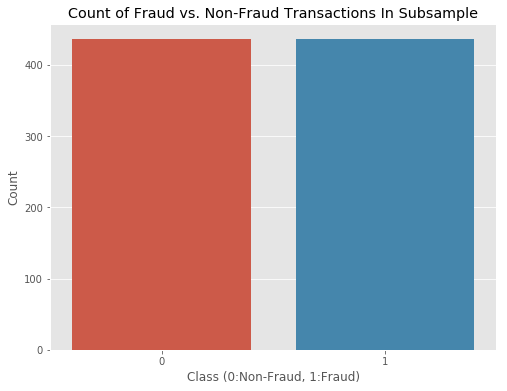

In [95]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraud vs. Non-Fraud Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraud, 1:Fraud)')

In [96]:
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-4.244e-01
V2,4.769e-01
V3,-5.645e-01
V4,7.112e-01
V5,-3.668e-01
V6,-4.243e-01
V7,-4.796e-01
V8,8.175e-02
V9,-5.671e-01
V10,-6.310e-01


In [97]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.564
V9,-0.567
V10,-0.631
V12,-0.680
V14,-0.752
V16,-0.598
V17,-0.560


In [98]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.711
V11,0.680
Class,1.000


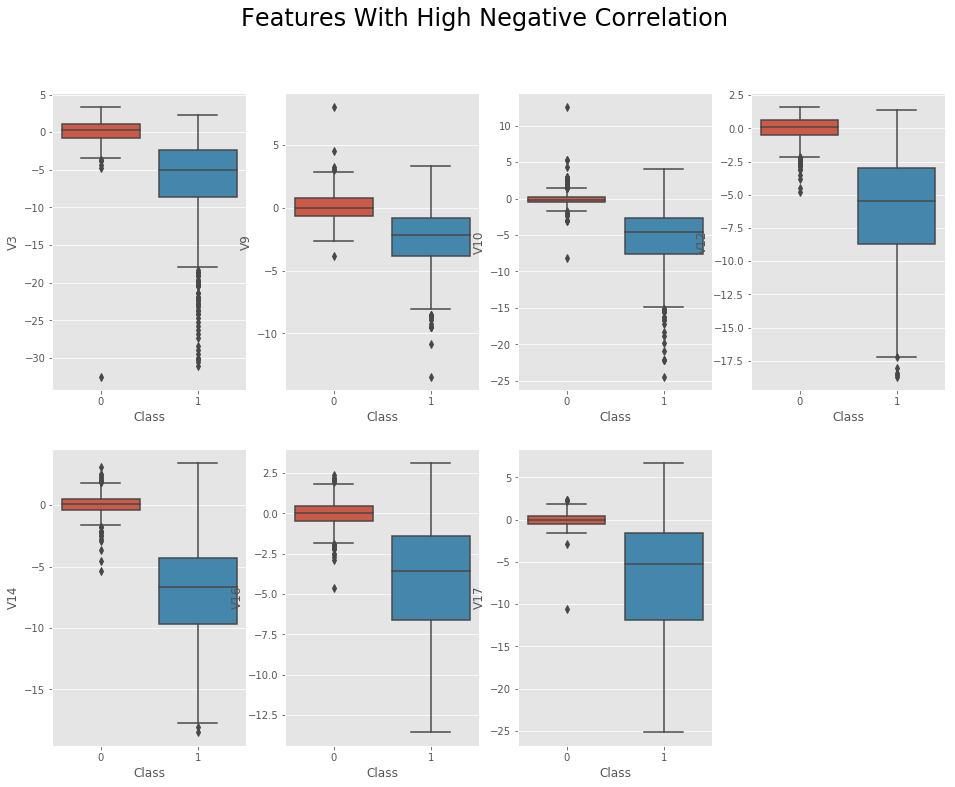

In [99]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,12))

f.suptitle('Features With High Negative Correlation', size=24)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

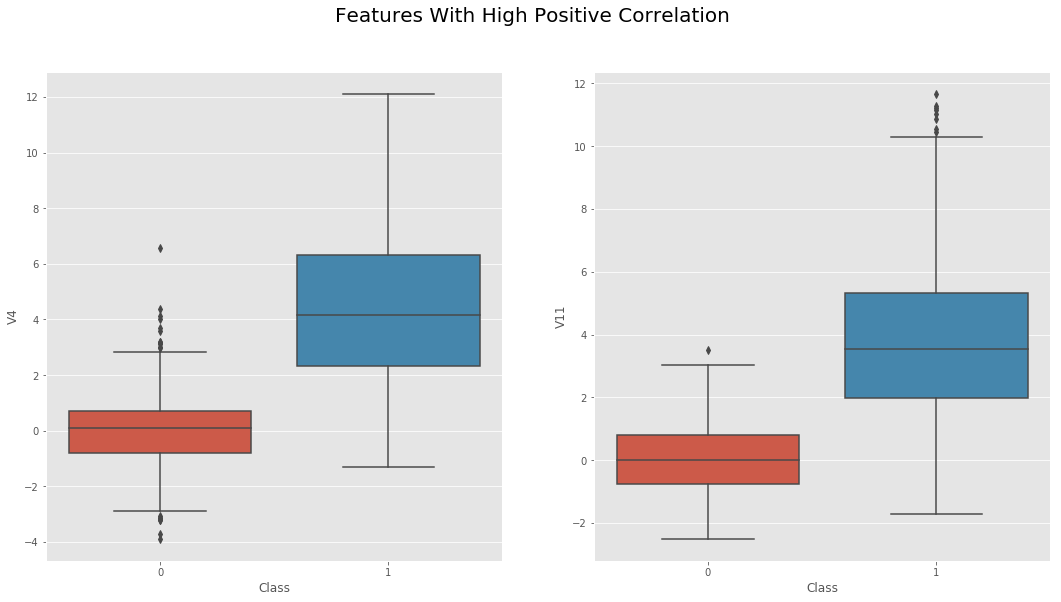

In [100]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Deal with Outlier**

In [0]:
#removing extreme outliers 
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [102]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 872 transactions by 264 transactions to 608 transactions.


**Dimensionality Reduction with t-SNE**

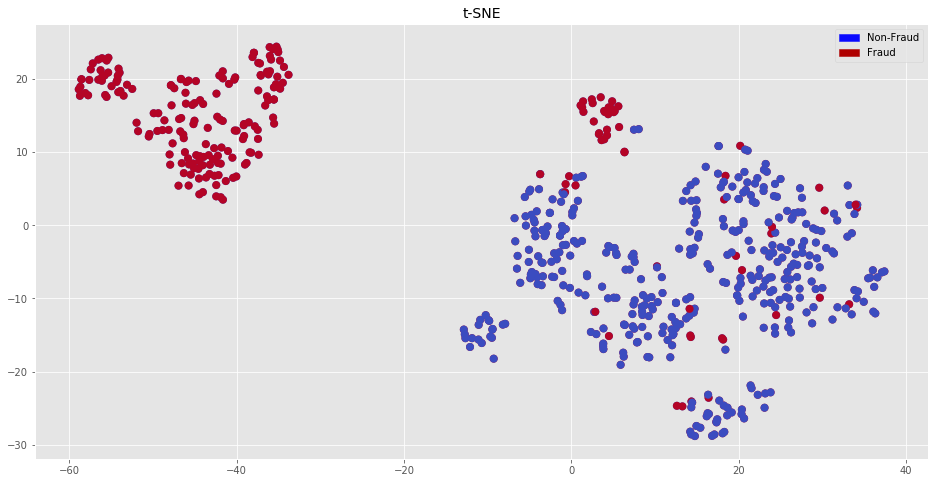

In [103]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(16,8))


blue_patch = mpatches.Patch(color='#0A0AFF', label='Non-Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non-Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

**Classification Algorithms**

In [0]:
#test-train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [106]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (486, 30) (122, 30) 

Y_shapes:
 Y_train: Y_validation:
 (486,) (122,)


In [107]:
#test models 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.972881 (0.025091)
LDA: 0.970144 (0.024447)
KNN: 0.957569 (0.032537)
CART: 0.889147 (0.040269)
SVM: 0.970676 (0.027003)
XGB: 0.966754 (0.019290)
RF: 0.955470 (0.050589)


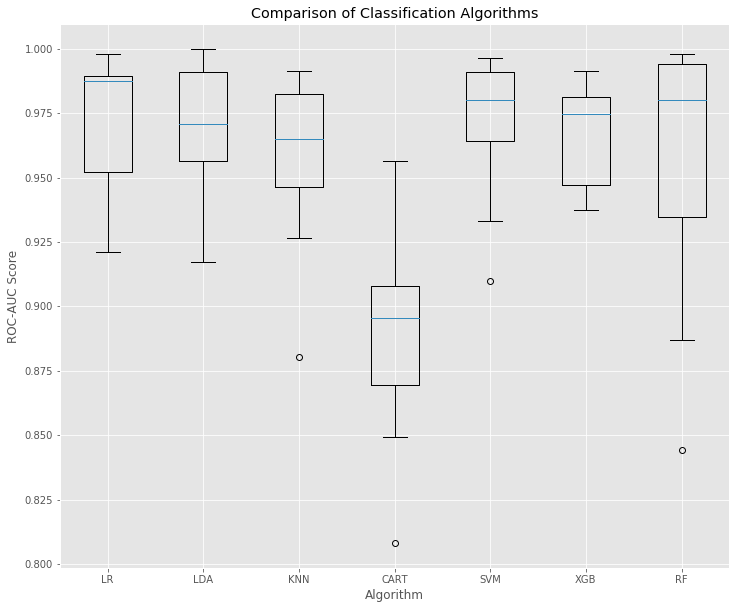

In [108]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

**Conclusion**

As we can see, there are a few algorithms stand out for either higher accuracy (LG) or wilder degree of comprehensiveness (RF). Fraud detection is complex which requires a significant amount of planning ahead before throwing models on it. Depends on the company's business goals, we have different ways to approach for future work. 